In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from random import gauss, uniform, shuffle
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras import models, layers, utils, backend as K
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [2]:
def perm_test_loop(X, y, loops = 200):
    og_score = LinearRegression().fit(X, y).score(X, y)

    y2 = y.copy()
    scores = []
    for loop_idx in range(loops):
        shuffle(y2)
        scores.append(LinearRegression().fit(X, y2).score(X, y2))
        
    scores_95 = np.sort(scores)[int(loops * 0.95)]
        
    return scores, og_score, scores_95

In [6]:
def perm_test_loop_nn(model, X, y, loops = 100):
    weights = model.get_weights()
    
    training = model.fit(X, y, epochs=100, batch_size=5, 
                         validation_split = 0, verbose = 0)
    og_score = max(training.history['R2'])

    y2 = y.copy()
    scores = []
    for loop_idx in range(loops):
        model.set_weights(weights)
        shuffle(y2)
        training = model.fit(X, y2, epochs=100, batch_size=5, 
                             validation_split = 0, verbose = 0)
        scores.append(max(training.history['R2']))
        print(loop_idx)
        
    scores_95 = np.sort(scores)[int(loops * 0.95)]
    
    return scores, og_score, scores_95

In [8]:
def R2(y, y_hat):
    ss_res = K.sum(K.square(y - y_hat)) 
    ss_tot = K.sum(K.square(y - K.mean(y))) 
    return (1 - ss_res/(ss_tot + K.epsilon()))

In [3]:
X = []
y_fixed = []
for i in range(100):
    x1 = gauss(0, 1)
    x2 = gauss(0, 1)
    X.append([x1, x2])
    y_fixed.append(uniform(0, 1))

scores, og_score, scores_95 = perm_test_loop(X, y_fixed)

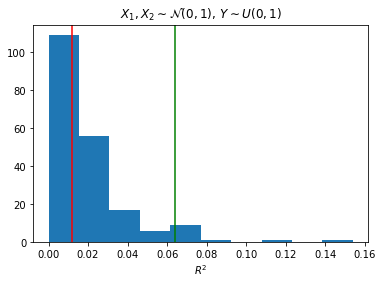

In [4]:
plt.hist(scores)
plt.axvline(og_score, c = 'r')
plt.axvline(scores_95, c = 'g')
plt.xlabel(r'$R^2$')
plt.title(r'$X_1,X_2\sim\mathcal{N}(0,1),\,Y\sim U(0,1)$')
plt.savefig('fig1.jpg', dpi = 300)

In [9]:
n_features = 2

NN_model = models.Sequential()

# The Input Layer :
NN_model.add(layers.Dense(15, kernel_initializer='normal',input_dim = n_features, 
                   activation='relu'))

# The Hidden Layers :
NN_model.add(layers.Dense(60, kernel_initializer='normal',activation='relu'))
NN_model.add(layers.Dense(60, kernel_initializer='normal',activation='relu'))
NN_model.add(layers.Dense(60, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(layers.Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', 
                 metrics=[R2])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 15)                45        
                                                                 
 dense_6 (Dense)             (None, 60)                960       
                                                                 
 dense_7 (Dense)             (None, 60)                3660      
                                                                 
 dense_8 (Dense)             (None, 60)                3660      
                                                                 
 dense_9 (Dense)             (None, 1)                 61        
                                                                 
Total params: 8,386
Trainable params: 8,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights = NN_model.get_weights()
X = []
y_fixed = []
for i in range(100):
    x1 = gauss(1, 1)
    x2 = gauss(0, 1)
    X.append([x1, x2])
    y_fixed.append(uniform(0, 1))

scores, og_score, scores_95 = perm_test_loop_nn(NN_model, X, y_fixed)

NN_model.set_weights(weights)

In [ ]:
plt.hist(scores)
plt.axvline(og_score, c = 'r')
plt.axvline(scores_95, c = 'g')
plt.xlabel(r'$R^2$')
plt.title(r'$X_1,X_2\sim\mathcal{N}(0,1),\,Y\sim U(0,1)$')
plt.savefig('fig2.jpg', dpi = 300)

In [ ]:
X = []
y_fixed = []
for i in range(100):
    x1 = gauss(1, 1)
    x2 = gauss(0, 1)
    X.append([x1, x2])
    eps = gauss(0, 1)
    y_fixed.append(np.log(np.abs(x1)) + x2 ** 2 + eps)

scores, og_score, scores_95 = perm_test_loop(X, y_fixed)

In [ ]:
plt.hist(scores)
plt.axvline(og_score, c = 'r')
plt.axvline(scores_95, c = 'g')
plt.xlabel(r'$R^2$')
plt.title(r'$X_1\sim\mathcal{N}(1,1),\,X_2\sim\mathcal{N}(0,1),\,Y=log|X_1|+X_2^2+\epsilon$')
plt.savefig('fig3.jpg', dpi = 300)

In [ ]:
weights = NN_model.get_weights()
X = []
y_fixed = []
for i in range(100):
    x1 = gauss(1, 1)
    x2 = gauss(0, 1)
    X.append([x1, x2])
    eps = gauss(0, 1)
    y_fixed.append(np.log(np.abs(x1)) + x2 ** 2 + eps)

scores, og_score, scores_95 = perm_test_loop_nn(NN_model, X, y_fixed)

NN_model.set_weights(weights)

In [ ]:
plt.hist(scores)
plt.axvline(og_score, c = 'r')
plt.axvline(scores_95, c = 'g')
plt.xlabel(r'$R^2$')
plt.title(r'$X_1\sim\mathcal{N}(1,1),\,X_2\sim\mathcal{N}(0,1),\,Y=log|X_1|+X_2^2+\epsilon$')
plt.savefig('fig4.jpg', dpi = 300)

In [11]:
og_score_table = []
scores_95_table = []
a_range = np.sort(np.concatenate((np.arange(1, 10, 0.1), 
                                  np.arange(0, 1, 0.001))))

for a in a_range:
    X = []
    y_fixed = []
    for i in range(100):
        x1 = gauss(a, 1)
        x2 = gauss(0, 0.1)
        X.append([x1, x2])
        eps = gauss(0, 0.1)
        y_fixed.append(np.log(np.abs(x1)) + x2 ** 2 + eps)

    model = LinearRegression()
    scores, og_score, scores_95 = perm_test_loop(X, y_fixed)
    og_score_table.append(og_score)
    scores_95_table.append(scores_95)

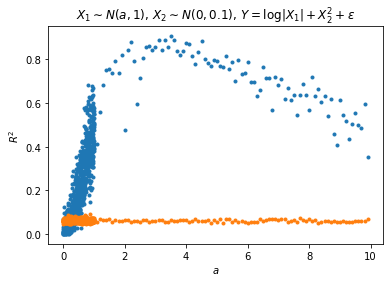

In [12]:
plt.plot(a_range, og_score_table, '.')
plt.plot(a_range, scores_95_table, '.')
plt.title(r'$X_1\sim N(a,1),\,X_2\sim N(0, 0.1),\,Y = \log|X_1| + X_2^2 + \epsilon$')
plt.xlabel(r'$a$')
plt.ylabel(r'$R^2$')
plt.savefig('fig5.jpg', dpi = 300)
plt.show()

In [ ]:
og_score_table = []
scores_95_table = []

a_range = np.arange(0, 10, 0.01)

for a in a_range:
    X = []
    y_fixed = []
    for i in range(100):
        x1 = gauss(a, 1)
        x2 = gauss(0, 0.5)
        X.append([x1, x2])
        eps = gauss(0, 0.1)
        y_fixed.append(np.log(np.abs(x1)) + x2 ** 2 + eps)

    model = LinearRegression()
    scores, og_score, scores_95 = perm_test_loop(X, y_fixed)
    og_score_table.append(og_score)
    scores_95_table.append(scores_95)

In [ ]:
plt.plot(a_range, og_score_table, '.')
plt.plot(a_range, scores_95_table, '.')
plt.title(r'$X_1\sim N(a,1),\,X_2\sim N(0, 0.5),\,Y = \log|X_1| + X_2^2 + \epsilon$')
plt.xlabel(r'$a$')
plt.ylabel(r'$R^2$')
plt.savefig('fig6.jpg', dpi = 300)
plt.show()

In [ ]:
og_score_table = []
scores_95_table = []
eps_range = np.arange(0, 1, 0.001)

mean = [0, 0]

for eps in eps_range:
    cov = [[1, eps], [eps, 1]]
    X, y = np.random.multivariate_normal(mean, cov, 100).T

    model = LinearRegression()
    scores, og_score, scores_95 = perm_test_loop([[x] for x in X], y)
    og_score_table.append(og_score)
    scores_95_table.append(scores_95)

In [ ]:
plt.plot(eps_range, og_score_table, '.')
plt.plot(eps_range, scores_95_table, '.')
plt.title(r'$X,Y = N([0, 0],[[1,\epsilon], [\epsilon, 1]])$')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$R^2$')
plt.savefig('fig7.jpg', dpi = 300)
plt.show()

In [ ]:
og_score_table = []
scores_95_table = []
eps_range = np.sort(np.concatenate((np.arange(10, 100, 10), 
                                    np.arange(100,1000,10))))

mean = [0, 0]
cov = [[1, 0], [0, 1]]

for eps in eps_range:
    X, y = np.random.multivariate_normal(mean, cov, eps).T

    model = LinearRegression()
    scores, og_score, scores_95 = perm_test_loop([[x] for x in X], y)
    og_score_table.append(og_score)
    scores_95_table.append(scores_95)

In [ ]:
plt.plot(eps_range, og_score_table, '.')
plt.plot(eps_range, scores_95_table, '.')
plt.title(r'$X, Y = N([0, 0], [[1,0], [0, 1]])$')
plt.xlabel(r'sample size')
plt.ylabel(r'$R^2$')
plt.savefig('fig8.jpg', dpi = 300)
plt.show()

In [ ]:
og_score_table = []
scores_95_table = []
eps_range = np.arange(10, 1000, 10)

mean = [0, 0]
cov = [[1, 0], [0, 1]]

for eps in eps_range:
    X = np.random.normal(10, 1, eps)
    y = np.log(X) + np.random.normal(0, 1, eps)

    model = LinearRegression()
    scores, og_score, scores_95 = perm_test_loop([[x] for x in X], y)
    og_score_table.append(og_score)
    scores_95_table.append(scores_95)

In [ ]:
plt.plot(eps_range, og_score_table, '.')
plt.plot(eps_range, scores_95_table, '.')
plt.title(r'$X\sim N(10, 1), Y = \log(X) + \epsilon, \epsilon\sim N(0, 1)$')
plt.xlabel(r'sample size')
plt.ylabel(r'$R^2$')
plt.savefig('fig9.jpg', dpi = 300)
plt.show()